In [1]:
#import the packages "Pandas" and "MatPlotLib" into Jupyter Notebook
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#We import the stock data of Facebook into Jupyter Notebook. The CSV file is located in the folder called "Data" in your Workspace
#We then name the DataFrame name as 'fb'
#fb = yf.DataFrame.from_csv('../data/facebook.csv')
#fb.head()

In [3]:
# yahoo finance is used to fetch data
import yfinance as yf
# Read data
fb = yf.download('FB')
ms = yf.download('MSFT')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
ms.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-23,337.049988,339.450012,333.559998,337.679993,337.679993,30427600
2021-11-24,336.279999,338.160004,333.910004,337.910004,337.910004,21661300
2021-11-26,334.350006,337.929993,328.119995,329.679993,329.679993,24217200
2021-11-29,334.940002,339.029999,334.739990,336.630005,336.630005,28563500
2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42833700


In [5]:
ms.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-23,337.049988,339.450012,333.559998,337.679993,337.679993,30427600
2021-11-24,336.279999,338.160004,333.910004,337.910004,337.910004,21661300
2021-11-26,334.350006,337.929993,328.119995,329.679993,329.679993,24217200
2021-11-29,334.940002,339.029999,334.739990,336.630005,336.630005,28563500
2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42833700


# Build a simple trading strategy for trading Facebook

## 1. Munging the stock data and add two columns - MA10 and MA50

In [6]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
# fb = pd.DataFrame.from_csv('../data/facebook.csv')
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2012-07-30,24.000000,24.040001,23.030001,23.150000,23.150000,29285900,27.521,29.8390
2012-07-31,23.370001,23.370001,21.610001,21.709999,21.709999,56179400,26.883,29.5086
2012-08-01,21.500000,21.580000,20.840000,20.879999,20.879999,44604400,26.060,29.2456
2012-08-02,20.770000,20.840000,19.820000,20.040001,20.040001,56374500,25.164,29.0264
2012-08-03,20.360001,22.160000,19.900000,21.090000,21.090000,80647000,24.397,28.8082


## 2. Add "Shares" column to make decisions base on the strategy

In [7]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

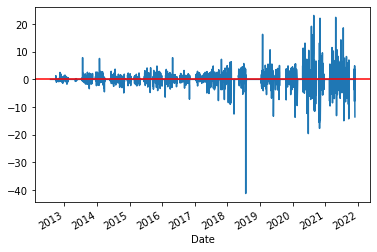

In [8]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')

## 3. Use .cumsum() to display our model's performance if we follow the strategy

In [9]:
#Use .cumsum() to calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2021-11-23,338.929993,341.399994,333.500000,337.250000,337.250000,17225000,338.981000,337.453400,1,341.059998,3.809998,199.599995
2021-11-24,336.000000,341.779999,332.809998,341.059998,341.059998,13566200,340.322998,336.796200,1,333.119995,-7.940002,191.659992
2021-11-26,335.799988,337.750000,331.899994,333.119995,333.119995,14750700,340.860999,335.997400,1,338.029999,4.910004,196.569996
2021-11-29,336.890015,340.670013,335.309998,338.029999,338.029999,16650900,340.574997,335.463600,1,324.459991,-13.570007,182.999989
2021-11-30,335.000000,335.809998,323.429993,324.459991,324.459991,25348500,338.264996,334.838799,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 182.9999885559082')

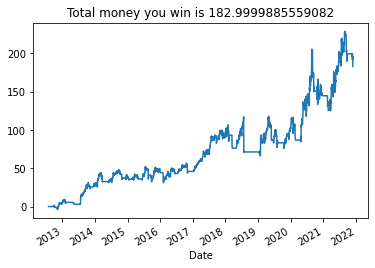

In [10]:
#plot the wealth to show the growth of profit over the period

fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

# Build a simple trading strategy for trading Microsoft

## 1. Munging the stock data and add two columns - MA10 and MA50

In [11]:
#import ms's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
# ms = pd.DataFrame.from_csv('../data/facebook.csv')
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA50'] = ms['Close'].rolling(50).mean()
ms = ms.dropna()
ms.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
1986-05-22,0.107639,0.108507,0.107639,0.107639,0.067955,4406400,0.110243,0.103463
1986-05-23,0.107639,0.109375,0.107639,0.107639,0.067955,4089600,0.109983,0.103672
1986-05-27,0.107639,0.111111,0.107639,0.111111,0.070147,13881600,0.109983,0.103880
1986-05-28,0.111111,0.114583,0.111111,0.114583,0.072339,15523200,0.110243,0.104123
1986-05-29,0.114583,0.118924,0.113715,0.117188,0.073983,45676800,0.110851,0.104470


In [12]:
fb.index

DatetimeIndex(['2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02',
               '2012-08-03', '2012-08-06', '2012-08-07', '2012-08-08',
               '2012-08-09', '2012-08-10',
               ...
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-26',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='Date', length=2351, freq=None)

In [13]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

ms['Shares'] = [1 if ms.loc[ei, 'MA10']>ms.loc[ei, 'MA50'] else 0 for ei in ms.index]

<ipython-input-13-a5d73c0a322c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms['Shares'] = [1 if ms.loc[ei, 'MA10']>ms.loc[ei, 'MA50'] else 0 for ei in ms.index]


<ipython-input-14-de78998d9a3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms['Close1'] = ms['Close'].shift(-1)
<ipython-input-14-de78998d9a3a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]


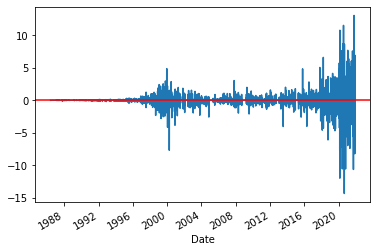

In [14]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]
ms['Profit'].plot()
plt.axhline(y=0, color='red')

In [15]:
#Use .cumsum() to calculate the accumulated wealth over the period

ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

<ipython-input-15-078600d05685>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms['wealth'] = ms['Profit'].cumsum()


,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2021-11-23,337.049988,339.450012,333.559998,337.679993,337.679993,30427600,337.653995,312.659600,1,337.910004,0.230011,153.081730
2021-11-24,336.279999,338.160004,333.910004,337.910004,337.910004,21661300,338.364996,313.321400,1,329.679993,-8.230011,144.851719
2021-11-26,334.350006,337.929993,328.119995,329.679993,329.679993,24217200,338.089996,313.810599,1,336.630005,6.950012,151.801731
2021-11-29,334.940002,339.029999,334.739990,336.630005,336.630005,28563500,338.080997,314.545800,1,330.589996,-6.040009,145.761722
2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42833700,337.532996,315.271600,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 145.76172222942114')

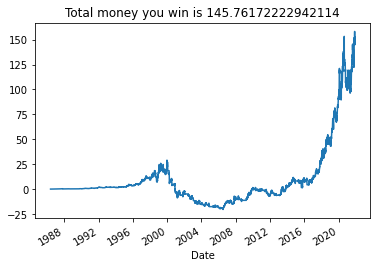

In [16]:
#plot the wealth to show the growth of profit over the period

ms['wealth'].plot()
plt.title('Total money you win is {}'.format(ms.loc[ms.index[-2], 'wealth']))